In [2]:
import numpy as np
import scipy as sc
import pylab as plt
from astropy.io import fits

In [3]:
halpha = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_6563.fits')
hbeta = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_4861.fits')
oIII = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_5007.fits')
nII = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_6584.fits')

In [5]:
tab_coorx = []
tab_coory = []
tab_nom = []

with open('/home/selin/Documents/M33/M33 SW/WRlistSWpx','r') as a_file :
    
    for line in a_file :
        line = line.split(',')
        tab_coorx.append(int(float(line[1])))
        tab_coory.append(int(float(line[0])))
        tab_nom.append(line[2])
        
tab_coorx = np.asarray(tab_coorx)
tab_coory = np.asarray(tab_coory)

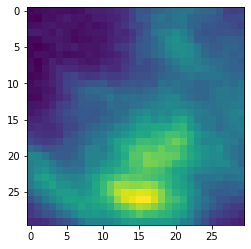

In [40]:
n = 21
r = 15
coorx = tab_coorx[n]
coory = tab_coory[n]
nom = tab_nom[n]
coorx_sn=tab_coorx[n]-10
coory_sn=tab_coory[n]-15
r_sn=10

coord_circ = []
coord_circ_sn=[]

for i in range(0,2*r):
    for j in range(0,2*r):
        if ((i-r)**2 + (j-r)**2) < r**2 :
            coord_circ.append([i,j])
            
for i in range(0,2*r_sn):
    for j in range(0,2*r_sn):
        if ((i-r_sn)**2 + (j-r_sn)**2) < r_sn**2 :
            coord_circ_sn.append([i,j])
            
halpha2 = halpha[coorx-r:coorx+r,coory-r:coory+r]
halpha2 = np.flipud(halpha2)
plt.imshow(halpha2)

halpha2_sn = halpha[coorx_sn-r_sn:coorx_sn+r_sn,coory_sn-r_sn:coory_sn+r_sn]
halpha2_sn = np.flipud(halpha2_sn)
#plt.imshow(halpha2_sn)

<ipython-input-41-70d7e9ec982c>:48: RuntimeWarning: invalid value encountered in log10
  yy_sn  = np.log10(oIII3_sn/hbeta3_sn)      # log10(OIII/Hbeta)


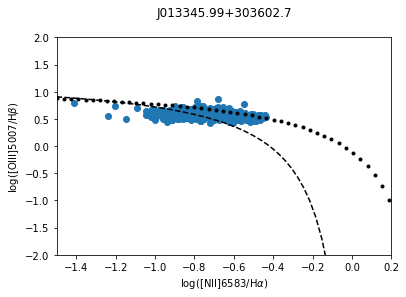

In [41]:
halpha2 = halpha[coorx-r:coorx+r,coory-r:coory+r]
halpha2 = np.flipud(halpha2)
halpha3 = [halpha2[i,j] for [i,j] in coord_circ]
halpha3 = np.asarray(halpha3)

hbeta2 = hbeta[coorx-r:coorx+r,coory-r:coory+r]
hbeta2 = np.flipud(hbeta2)
hbeta3 = [hbeta2[i,j] for [i,j] in coord_circ]
hbeta3 = np.asarray(hbeta3)

oIII2 = oIII[coorx-r:coorx+r,coory-r:coory+r]
oIII2 = np.flipud(oIII2)
oIII3 = [oIII2[i,j] for [i,j] in coord_circ]
oIII3 = np.asarray(oIII3)

nII2 = nII[coorx-r:coorx+r,coory-r:coory+r]
nII2 = np.flipud(nII2)
nII3 = [nII2[i,j] for [i,j] in coord_circ]
nII3 = np.asarray(nII3)

f = plt.figure(1)
xx  = np.log10(nII3/halpha3)      # log10(NII/Halpha)
yy  = np.log10(oIII3/hbeta3)      # log10(OIII/Hbeta)

plt.scatter(xx,yy)

halpha2_sn = halpha[coorx_sn-r_sn:coorx_sn+r_sn,coory_sn-r_sn:coory_sn+r_sn]
halpha2_sn = np.flipud(halpha2_sn)
halpha3_sn = [halpha2_sn[i,j] for [i,j] in coord_circ_sn]
halpha3_sn = np.asarray(halpha3_sn)

hbeta2_sn = hbeta[coorx_sn-r_sn:coorx_sn+r_sn,coory_sn-3-r_sn:coory_sn-3+r_sn]
hbeta2_sn = np.flipud(hbeta2_sn)
hbeta3_sn = [hbeta2_sn[i,j] for [i,j] in coord_circ_sn]
hbeta3_sn = np.asarray(hbeta3_sn)

oIII2_sn = oIII[coorx_sn-r_sn:coorx_sn+r_sn,coory_sn-3-r_sn:coory_sn-3+r_sn]
oIII2_sn = np.flipud(oIII2_sn)
oIII3_sn = [oIII2_sn[i,j] for [i,j] in coord_circ_sn]
oIII3_sn = np.asarray(oIII3_sn)

nII2_sn = nII[coorx_sn-r_sn:coorx_sn+r_sn,coory_sn-r_sn:coory_sn+r_sn]
nII2_sn = np.flipud(nII2_sn)
nII3_sn = [nII2_sn[i,j] for [i,j] in coord_circ_sn]
nII3_sn = np.asarray(nII3_sn)

xx_sn  = np.log10(nII3_sn/halpha3_sn)      # log10(NII/Halpha)
yy_sn  = np.log10(oIII3_sn/hbeta3_sn)      # log10(OIII/Hbeta)

#plt.scatter(xx_sn,yy_sn, color='r', label = 'Supernova remnant')

X = np.linspace(-1.5,0.3)
Y = (0.61/( X  - 0.47  )) + 1.19

# Kauffmann+03 ---------------------------------------
Xk = np.linspace(-1.5,0.)
Yk = 0.61/(Xk -0.05) + 1.3

plt.plot(X,Y,'.k')
plt.plot(Xk,Yk,'--k')

plt.xlabel(r'log([NII]6583/H$\alpha$)')
plt.ylabel(r'log([OIII]5007/H$\beta$)')
plt.xlim(-1.5,0.2)
plt.ylim(-2,2)
plt.title(nom)

plt.savefig("BPT_{}.png".format(nom))
plt.show()